This is a quick start to be used preferentially in Google Colab.
Of course, it can be adapted (expecially for the parallelization) to be used in a local machine.

Have fun!

# Install the `nested_fit` package

If you need to install the package, here are the basic commands.

If you want to install the program locally in your machine, copy the command and adapt.
For example, to enable the parallel computing, use the adapted compiltion line. More details are presented in the `README` file.


In [1]:
import os

# Get the root directory of the project
# (change place as you wish in a local machine)
root_directory = os.path.expanduser("~")

# Download nested_fit
!cd $root_directory/ && rm -rf nested_fit && git clone -b dev https://github.com/martinit18/nested_fit.git

# Compilation and installation -------------------------------------------------
# Standard installation
!mkdir -p $root_directory/nested_fit/build && cd $root_directory/nested_fit/build/ && cmake -DCMAKE_BUILD_TYPE=Release .. && cmake --build . --config Release --target install
# Installation with parallelization
# mkdir -p $root_directory/nested_fit/build && cd $root_directory/nested_fit/build/ && cmake -DOPENMP=ON -DCMAKE_BUILD_TYPE=Release .. && cmake --build . --config Release --target install
# Installation in a different location (to change the $PATH accordingly). The binaries will be installed in the directory <target directory>/bin
# !mkdir -p $root_directory/nested_fit/build && cd $root_directory/nested_fit/build/ && cmake -DINSTALL_SYSTEM_WIDE=ON -DCMAKE_INSTALL_PREFIX=<target directory> -DCMAKE_BUILD_TYPE=Release .. && cmake --build . --config Release --target install
# ------------------------------------------------------------------------------


Cloning into 'nested_fit'...
remote: Enumerating objects: 3953, done.
remote: Counting objects: 100% (2073/2073), done.
remote: Compressing objects: 100% (682/682), done.
remote: Total 3953 (delta 1497), reused 1863 (delta 1346), pack-reused 1880 (from 1)
Receiving objects: 100% (3953/3953), 12.52 MiB | 10.76 MiB/s, done.
Resolving deltas: 100% (2635/2635), done.
-- The Fortran compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Check for working Fortran compiler: /usr/bin/f95 - skipped
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Warning (dev) at /usr/local/lib/python3.10/dist-packages/cmake/data/share/cmake-3.30/Modules/FetchContent.cmake:1953 (message):
  Calling FetchContent_Populate(tracy) is

In [2]:
from importlib.metadata import version as imp_version

# Install python libraries
os.chdir(root_directory+ '/nested_fit')
!pip install -e .

# Make a useful symlink
source = root_directory + '/nested_fit/bin/nested_fit' + imp_version('nested_fit')
target = root_directory + '/nested_fit/bin/nested_fit'
try: os.symlink(source, target)
except FileExistsError: pass

# Add binaries path
os.environ["PATH"] = root_directory + "/nested_fit/bin:" + os.environ["PATH"]

Obtaining file:///root/nested_fit
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.5/826.5 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:00
  Building editable for nested_fit (pyproject.toml) ... done
  Created wheel for nested_fit: filename=nested_fit-5.3.1-0.editable-cp310-cp310-linux_x86_64.whl size=4710 sha256=d083c9b1f19b53be5ab450afbb4ef0b42f0e6b1203cc3ebc7d

# Run nested_sampling

In [3]:
# Import main python library
import pynested_fit as pynf
import os
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [4]:
# Change directory
path = root_directory + '/nested_fit/examples/jupyter_notebooks/res_1gauss_bg'
os.chdir(path)

In [7]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1|)^2/(2s^2)} + b_g'],
    params={                    # Parameters boundaries and co.
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500 },
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30  }
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    # search_method='SLICE_SAMPLING', # Search method
    # search_params=(0.5, 3),         # Parameters of chosen method
    # search_maxsteps=100000,         # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # cluster_enable=False,           # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [6]:
# Run the code

# For visualising the progress of the execution use this command
# out = conf.sample(output_mode='live')
# If nothing shows, use simply the command (symlink to created or version to be used)
!nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g
Infix expression: A1/(s*SQRT(2*pi))*EXP(-(x-x1)**2/(2*s**2))+bg
      Parameters: A_1, b_g, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -1500.887091104852743 | Evidence:   -1508.903332605949799 | Ev. step:   -1508.917560302033053 | Ev. pres. acc.:  1.1762058E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1327.554883958581968 | Evidence:   -1334.876039714471290 | Ev. step:   -1334.942545939748697 | Ev. pres. acc.:  1.0020785E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1229.840583397745149 | Evidence:   -1236.325814641283841 | Ev. step:   -1237.078948315348043 | Ev. pres. acc.:  9.0342830E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1163.484517858509662 | Evidence:   -1169.951844518192956 | Ev. step:   -1171.33

In [20]:
!cat nf_output_res.dat

 #############_FINAL_RESULTS_#####################################################################################
 N._of_trials:                                      1
 N._of_total_iteration:                         22552
 N._of_likelihood_calls_((1)*1.E+9+(2)):                     0              2396222
 N._of_used_livepoints:                          1000
 Final_evidence_(log):                     -338.26798452301568     
 Evidence_estimated_uncertainty_(log):      8.9987633844894319E-002
 Evidence_standard_deviation_(log):         0.0000000000000000     
 ------------------------------------------------------------------------------------------------------------------
 Max_likelihood_(log):  -328.22943982427222     
 Max_parameter_set: 
 A            299.88316194774382     
 x_0          454.35607826460136     
 s            26.204261635360528     
 b_g          9.7992544517512548E-002
 ------------------------------------------------------------------------------------------------

# Visualization of output data and post-calculations

In [21]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an = pynf.Analysis()

Current path =  .
Available parameters : ['weight', 'lnlikelihood', 'val_1', 'val_2', 'val_3', 'val_4']


/root/nested_fit/pynested_fit/nested_res.py:80: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  self.df = pd.read_csv(path+'nf_output_points.txt', delim_whitespace=True, header=0,


0 max
nf_output_data_max.dat


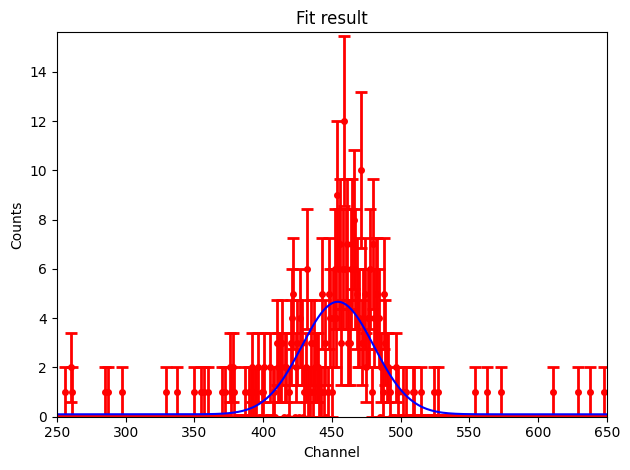

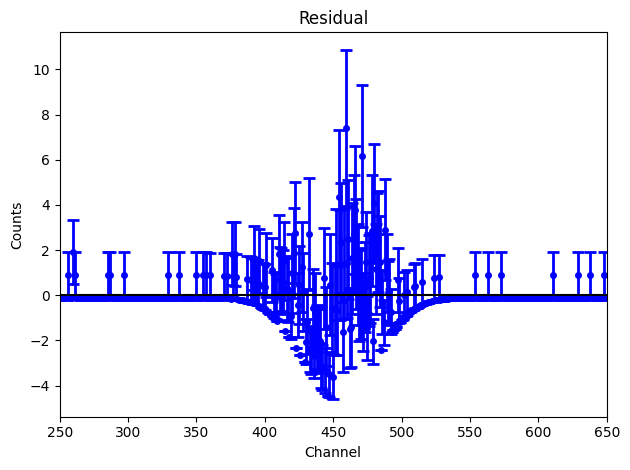

In [9]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

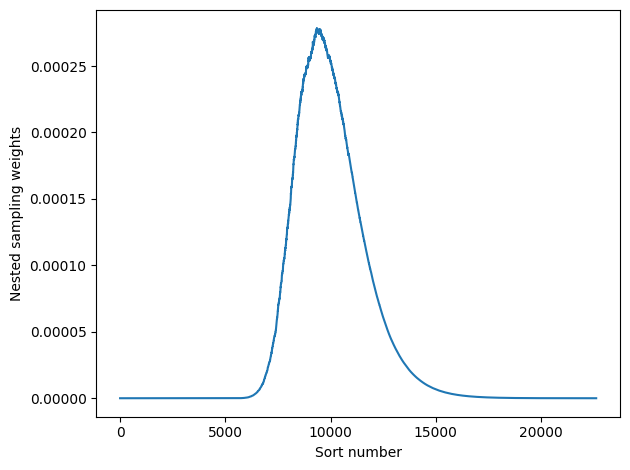

In [11]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

In [14]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│                                                                                                  │
│ /root/nested_fit/pynested_fit/nested_res.py:830 in plot_par                                      │
│                                                                                                  │
│    827 │   │                                                                                     │
│    828 │   │                                                                                     │
│    829 │   │   # Determine if the par_number is a name or a number and convert consequently      │
│ ❱  830 │   │   par_index, title = self.get_parinfo(par_number)                                   │
│    831 │   │                                                                                     │
│    832 │   │   # Read the data                                                                   │
│    833 │   │   data = self.df.values                                                             │
│                                                                                                  │
│ /root/nested_fit/pynested_fit/nested_res.py:701 in get_parinfo                                   │
│                                                                                                  │
│    698 │   │                                                                                     │
│    699 │   │   # Find the good number of parameter from its number or name                       │
│    700 │   │   if type(par_number) == str:                                                       │
│ ❱  701 │   │   │   par_index = list(self.df.columns).index(par_number)                           │
│    702 │   │   │   title = par_number                                                            │
│    703 │   │   │   print("Set par_number %s to %s" % (par_number, par_index))                    │
│    704 │   │   else:                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: 'A' is not in list

In [13]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 3>:3                                                                              │
│                                                                                                  │
│ /root/nested_fit/pynested_fit/nested_res.py:724 in histo                                         │
│                                                                                                  │
│    721 │   │                                                                                     │
│    722 │   │                                                                                     │
│    723 │   │   # Find the good number of parameter from its number or name                       │
│ ❱  724 │   │   par_index, title = self.get_parinfo(par_number)                                   │
│    725 │   │                                                                                     │
│    726 │   │   if bins<10:                                                                       │
│    727 │   │   │   sys.exit('Attention! too fews bins')                                          │
│                                                                                                  │
│ /root/nested_fit/pynested_fit/nested_res.py:701 in get_parinfo                                   │
│                                                                                                  │
│    698 │   │                                                                                     │
│    699 │   │   # Find the good number of parameter from its number or name                       │
│    700 │   │   if type(par_number) == str:                                                       │
│ ❱  701 │   │   │   par_index = list(self.df.columns).index(par_number)                           │
│    702 │   │   │   title = par_number                                                            │
│    703 │   │   │   print("Set par_number %s to %s" % (par_number, par_index))                    │
│    704 │   │   else:                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: 'A' is not in list

Set par_number A_1 to 4
Set par_number x_1 to 3


/root/nested_fit/pynested_fit/nested_res.py:1119: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/root/nested_fit/pynested_fit/nested_res.py:1120: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/root/nested_fit/pynested_fit/nested_res.py:1121: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/root/nested_fit/pynested_fit/nested_res.py:1122: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb_rest)


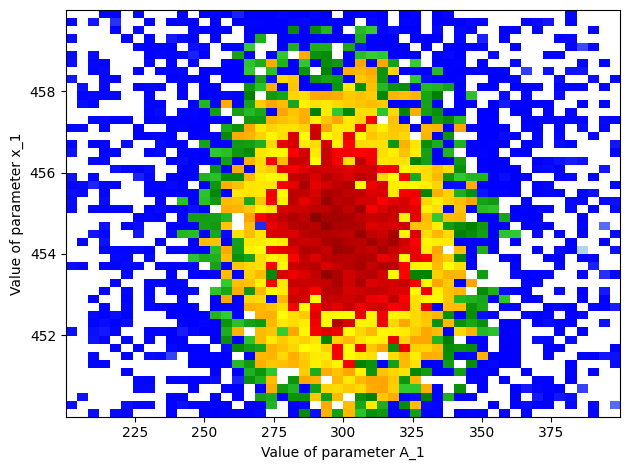

In [ ]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

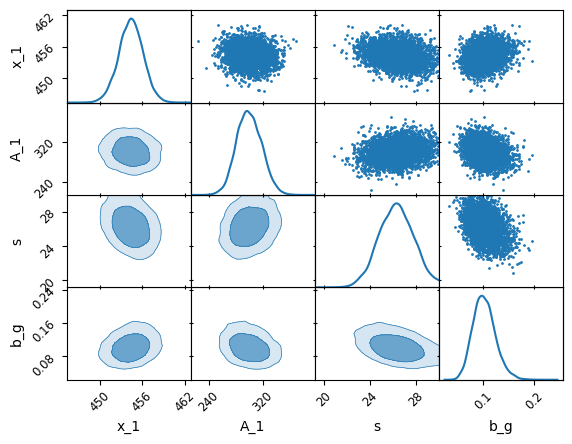

In [ ]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

In [ ]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.277790 	± 0.088895
D_KL 	 = 8.107449 	± 0.079362
logL_P 	 = -330.170341 	± 0.031875
d_G 	 = 3.786216 	± 0.097617
